In [53]:
import time

from _context import vugrad
import vugrad as vg
import numpy as np
import matplotlib.pyplot as plt
import json



In [54]:
a = vg.TensorNode(np.random.randn(2, 2))
b = vg.TensorNode(np.random.randn(2, 2))
c = a + b

In [55]:
a.value

array([[ 0.87937145,  0.98068353],
       [-0.85613096, -1.39071838]])

In [56]:
b.value

array([[-0.27772975, -0.62718503],
       [ 1.02010072,  0.11656474]])

In [57]:
c.value

array([[ 0.6016417 ,  0.3534985 ],
       [ 0.16396976, -1.27415363]])

In [58]:
c.source

In [59]:
c.source.inputs[0]

In [60]:
a

In [61]:
a.grad

array([[0., 0.],
       [0., 0.]])

In [62]:
c = b + a

In [63]:
c.source.inputs[0]

In [64]:
b

In [65]:
x = np.array([[1, 2], [3, 4], [5, 6]])
sumd = x.sum(axis=1, keepdims=True)

In [66]:
sumd

array([[ 3],
       [ 7],
       [11]])

In [67]:
x/sumd

array([[0.33333333, 0.66666667],
       [0.42857143, 0.57142857],
       [0.45454545, 0.54545455]])

In [68]:
sumd2 = sumd * sumd
sumd2

array([[  9],
       [ 49],
       [121]])

In [69]:
x/sumd2

array([[0.11111111, 0.22222222],
       [0.06122449, 0.08163265],
       [0.04132231, 0.04958678]])

In [70]:
import numpy as np

# Helper function to extract metrics
def extract_metrics_from_file(filename, runs=10, epochs=20):
    with open(filename, "r") as file:
        data = file.read()

    loss_runs = []
    accuracy_runs = []
    blocks = data.split("## Starting training")[1:] 
    for block in blocks[:runs]:
        loss = []
        accuracy = []
        lines = block.splitlines()
        for line in lines:
            if "accuracy" in line:
                accuracy.append(float(line.split(":")[1].strip()))
            elif "running loss" in line:
                loss.append(float(line.split(":")[1].strip()))
        if len(loss) == epochs and len(accuracy) == epochs:
            loss_runs.append(loss)
            accuracy_runs.append(accuracy)
    return np.array(loss_runs), np.array(accuracy_runs)

filename = "raw_data"

with open(filename, "r") as f:
    content = f.read()
    total_lines = len(content.splitlines())
    midpoint = total_lines // 2

sigmoid_data = "\n".join(content.splitlines()[:midpoint])
relu_data = "\n".join(content.splitlines()[midpoint:])

with open("sigmoid_results.txt", "w") as f:
    f.write(sigmoid_data)

with open("relu_results.txt", "w") as f:
    f.write(relu_data)

sigmoid_losses, sigmoid_accuracies = extract_metrics_from_file("sigmoid_results.txt")
relu_losses, relu_accuracies = extract_metrics_from_file("relu_results.txt")

print("Sigmoid Losses Shape:", sigmoid_losses.shape)
print("Sigmoid Accuracies Shape:", sigmoid_accuracies.shape)
print("ReLU Losses Shape:", relu_losses.shape)
print("ReLU Accuracies Shape:", relu_accuracies.shape)


Sigmoid Losses Shape: (10, 20)
Sigmoid Accuracies Shape: (10, 20)
ReLU Losses Shape: (10, 20)
ReLU Accuracies Shape: (10, 20)


In [71]:
print("Sigmoid Loss Stats: Max =", np.max(sigmoid_losses), "Min =", np.min(sigmoid_losses), "Mean =", np.mean(sigmoid_losses))
print("ReLU Loss Stats: Max =", np.max(relu_losses), "Min =", np.min(relu_losses), "Mean =", np.mean(relu_losses))


Sigmoid Loss Stats: Max = 0.4089 Min = 0.01725 Mean = 0.07877265
ReLU Loss Stats: Max = 81060.0 Min = 0.06735 Mean = 834.17768525


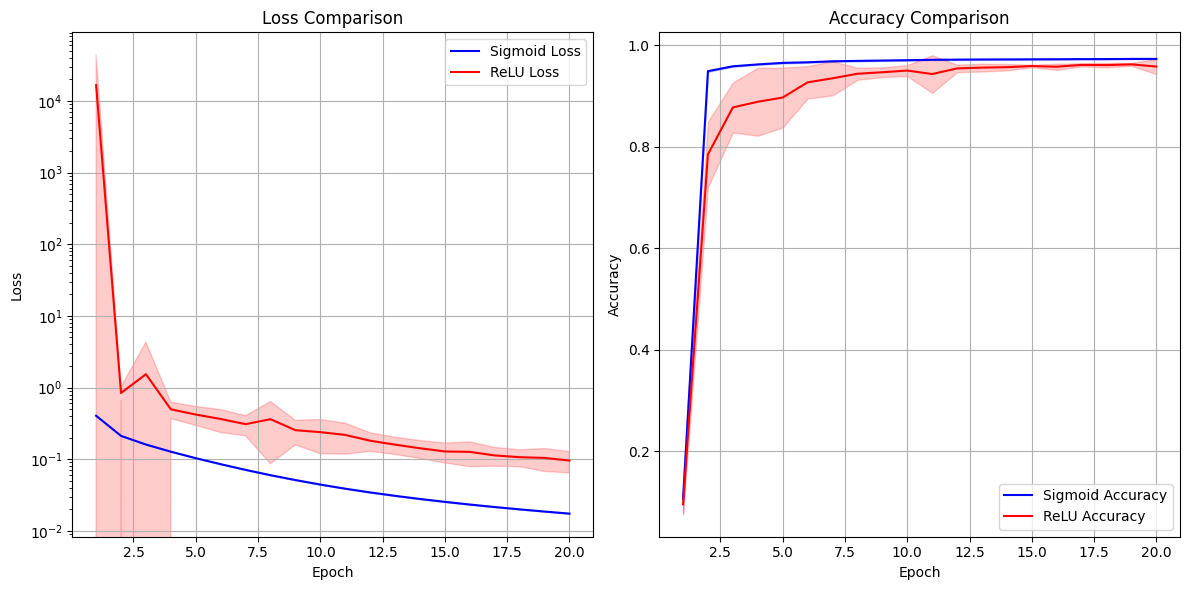

In [72]:
import matplotlib.pyplot as plt

# 绘制损失函数比较
epochs = np.arange(1, 21)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, sigmoid_losses.mean(axis=0), label="Sigmoid Loss", color="blue")
plt.yscale('log')
plt.fill_between(
    epochs,
    sigmoid_losses.mean(axis=0) - sigmoid_losses.std(axis=0),
    sigmoid_losses.mean(axis=0) + sigmoid_losses.std(axis=0),
    color="blue",
    alpha=0.2,
)
plt.plot(epochs, relu_losses.mean(axis=0), label="ReLU Loss", color="red")
plt.fill_between(
    epochs,
    relu_losses.mean(axis=0) - relu_losses.std(axis=0),
    relu_losses.mean(axis=0) + relu_losses.std(axis=0),
    color="red",
    alpha=0.2,
)
plt.title("Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, sigmoid_accuracies.mean(axis=0), label="Sigmoid Accuracy", color="blue")
plt.fill_between(
    epochs,
    sigmoid_accuracies.mean(axis=0) - sigmoid_accuracies.std(axis=0),
    sigmoid_accuracies.mean(axis=0) + sigmoid_accuracies.std(axis=0),
    color="blue",
    alpha=0.2,
)
plt.plot(epochs, relu_accuracies.mean(axis=0), label="ReLU Accuracy", color="red")
plt.fill_between(
    epochs,
    relu_accuracies.mean(axis=0) - relu_accuracies.std(axis=0),
    relu_accuracies.mean(axis=0) + relu_accuracies.std(axis=0),
    color="red",
    alpha=0.2,
)
plt.title("Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [73]:
from asg.question10 import AdjustableMLP, train_and_evaluate, mnist

(xtrain, ytrain), (xval, yval), num_classes = mnist()
num_instances, num_features = xtrain.shape

# Batch size and epochs
batch_size = 128
num_epochs = 10
learning_rate = 0.0001

# Experiment results
results = []

In [74]:
rounds_per_config = 5

# Adjustable parameters
hidden_sizes = [128, 256]
num_layers_options = [2, 3, 4]
momentum_factors = [0.0, 0.5, 0.9]
use_residual_options = [False, True]
init_types = ["glorot", "normal"]

In [75]:

input_size, output_size = num_features, num_classes
for hidden_size in hidden_sizes:
    for num_layers in num_layers_options:
        for use_residual in use_residual_options:
            for init_type in init_types:
                for momentum_factor in momentum_factors:
                    config_results = {
                        "hidden_size": hidden_size,
                        "num_layers": num_layers,
                        "use_residual": use_residual,
                        "init_type": init_type,
                        "momentum_factor": momentum_factor,
                        "average_time": 0,
                        "rounds": []
                    }
                    start_time = time.time()
                    for round_num in range(rounds_per_config):
                        print(f"Running: hidden_size={hidden_size}, num_layers={num_layers}, "
                              f"residual={use_residual}, init={init_type}, momentum={momentum_factor}, round={round_num+1}")

                        # Create MLP with current configuration
                        mlp = AdjustableMLP(
                            input_size=input_size,
                            output_size=output_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            use_residual=use_residual,
                            init_type=init_type
                        )

                        # Train and evaluate
                        train_loss, val_acc = train_and_evaluate(mlp, learning_rate, momentum_factor, xtrain, ytrain, xval, yval, batch_size, num_epochs)

                        # Record results for this round
                        config_results["rounds"].append({
                            "train_loss": train_loss,
                            "val_acc": val_acc
                        })
                    end_time = time.time()
                    config_results["average_time"] = (end_time - start_time)/rounds_per_config

                    # Log the configuration results
                    results.append(config_results)

# Save results to a JSON file
with open("experiment_results_q10.json", "w") as f:
    json.dump(results, f, indent=4)

print("Experiment completed. Results saved to experiment_results.json.")

Running: hidden_size=128, num_layers=2, residual=False, init=glorot, momentum=0.0, round=1
epoch 000
       accuracy: 0.1024


C:\Users\Jalon\OneDrive\桌面\in The Netherland\Deep Learning\assignments\asg2\vugrad_deep_learning_asg2\vugrad\ops.py:181: RuntimeWarning: overflow encountered in exp
  sigx =  1 / (1 + np.exp(-input))


KeyboardInterrupt: 

In [42]:
def compare_setting_combinations(results, filters, titles):
    """
    Compare two setting combinations based on specified filters.

    :param results: Experiment results loaded from JSON.
    :param filters1: Dictionary of filters for the first set of configurations (e.g., {"hidden_size": 128}).
    :param filters2: Dictionary of filters for the second set of configurations (e.g., {"momentum_factor": 0.9}).
    :param title1: Title for the first set of configurations.
    :param title2: Title for the second set of configurations.
    """
    def filter_results(results, all_filters):
        """Filter results based on the given filter dictionary."""
        filtered = [
            config for config in results
            if all(config[key] == value for key, value in all_filters.items())
        ]
        return filtered

    # Filter results based on the provided filters
    configs = [filter_results(results, filter) for filter in filters]

    # Combine results across filtered configurations
    def combine_rounds(configs):
        train_losses = []
        val_accuracies = []
        for config in configs:
            train_losses.extend([round_data['train_loss'] for round_data in config['rounds']])
            val_accuracies.extend([round_data['val_acc'] for round_data in config['rounds']])
        return np.array(train_losses), np.array(val_accuracies)

    train_losses = []
    val_accuracies = []
    for config in configs:
        train_loss, val_acc = combine_rounds(config)
        train_losses.append(train_loss)
        val_accuracies.append(val_acc)

    # Compute mean and std for both settings
    train_losses_means, train_losses_stds, val_acc_means, val_acc_stds = [], [], [], []
    for train_loss, val_acc in zip(train_losses, val_accuracies):
        train_losses_means.append(train_loss.mean(axis=0))
        train_losses_stds.append(train_loss.std(axis=0))
        val_acc_means.append(val_acc.mean(axis=0))
        val_acc_stds.append(val_acc.std(axis=0))
    epoch_length = train_losses_means[0].shape[1]
    epochs = np.arange(1, epoch_length + 1)
    colors = ["red", "blue", "green", "cyan", "magenta", "yellow", "black"]

    # Plot Loss Comparison
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for i, title in enumerate(titles):
        plt.plot(epochs, train_losses_means[i], label=title, color=colors[i])
        plt.fill_between(epochs, train_losses_means[i] - train_losses_stds[i], train_losses_means[i] + train_losses_stds[i], color=colors[i], alpha=0.2)

    plt.title("Loss Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    # Plot Accuracy Comparison
    plt.subplot(1, 2, 2)
    for i, title in enumerate(titles):
        plt.plot(epochs, val_acc_means[i], label=title, color=colors[i])
        plt.fill_between(epochs, val_acc_means[i] - val_acc_stds[i], val_acc_means[i] + val_acc_stds[i], color=colors[i], alpha=0.2)

    plt.title("Accuracy Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


In [76]:
results = json.load(open("experiment_results_q10.json"))


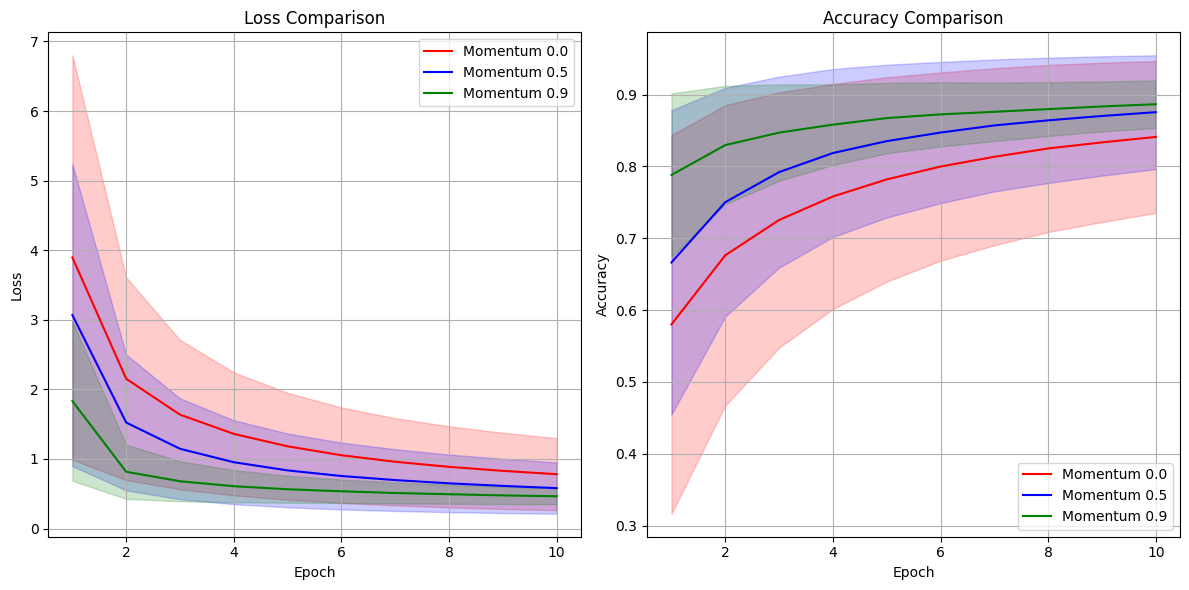

In [77]:
filters1 = {"momentum_factor": 0.0}
filters2 = {"momentum_factor": 0.5}
filters3 = {"momentum_factor": 0.9}
compare_setting_combinations(results, [filters1, filters2, filters3], ["Momentum 0.0", "Momentum 0.5", "Momentum 0.9"])

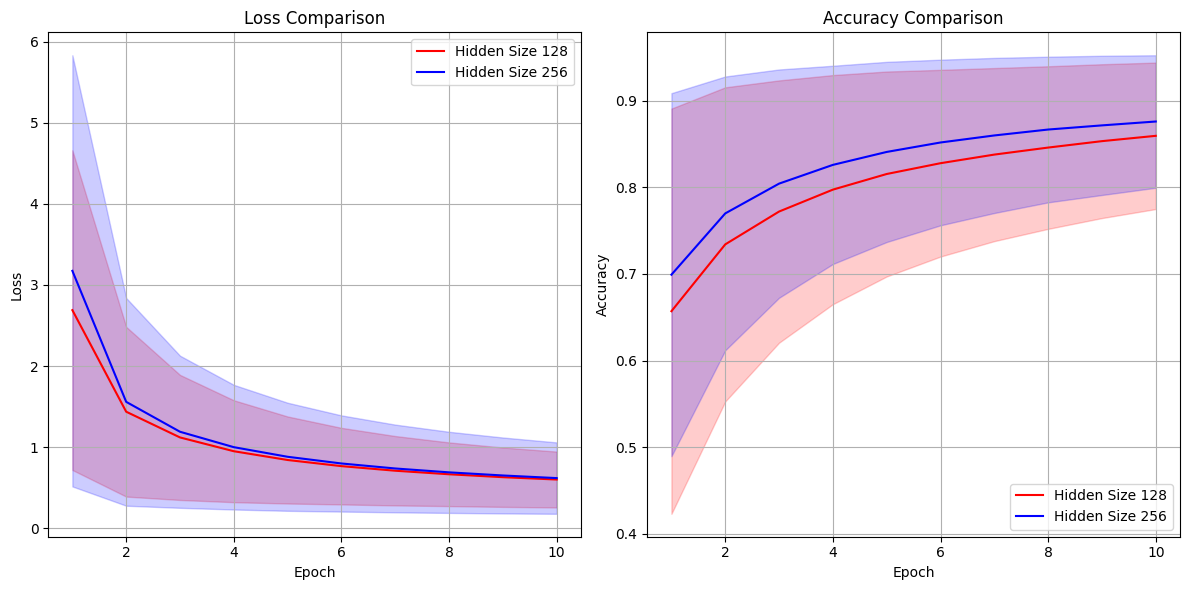

In [78]:
filters1 = {"hidden_size": 128}
filters2 = {"hidden_size": 256}
compare_setting_combinations(results, [filters1, filters2], ["Hidden Size 128", "Hidden Size 256"])

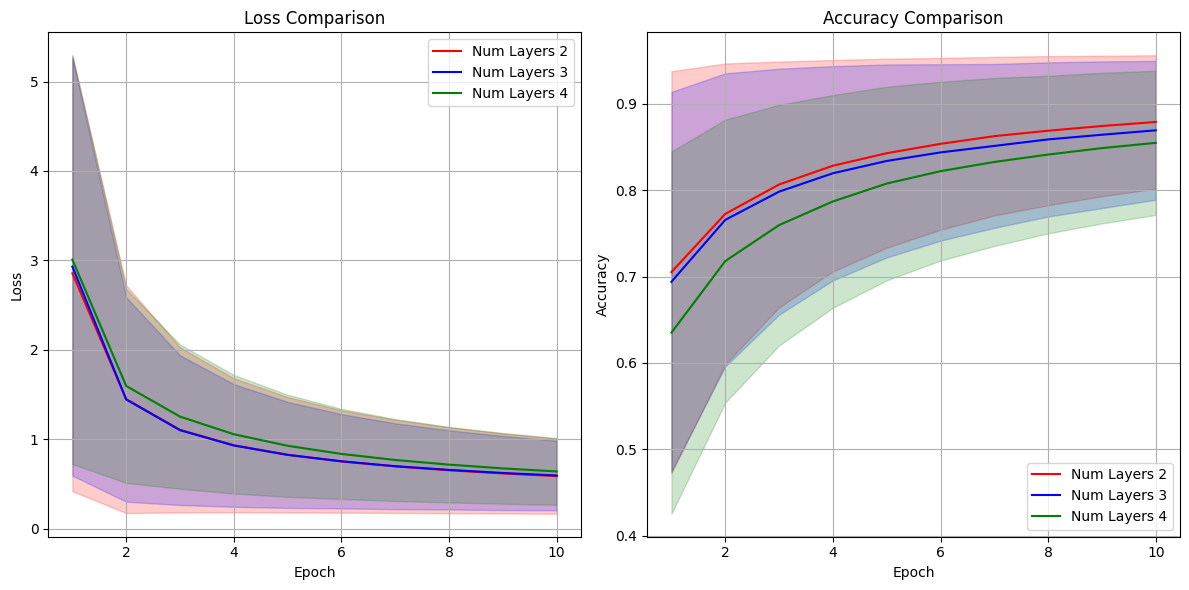

In [82]:
filters1 = {"num_layers": 2}
filters2 = {"num_layers": 3}
filters3 = {"num_layers": 4}
compare_setting_combinations(results, [filters1, filters2, filters3], ["Num Layers 2", "Num Layers 3", "Num Layers 4"])

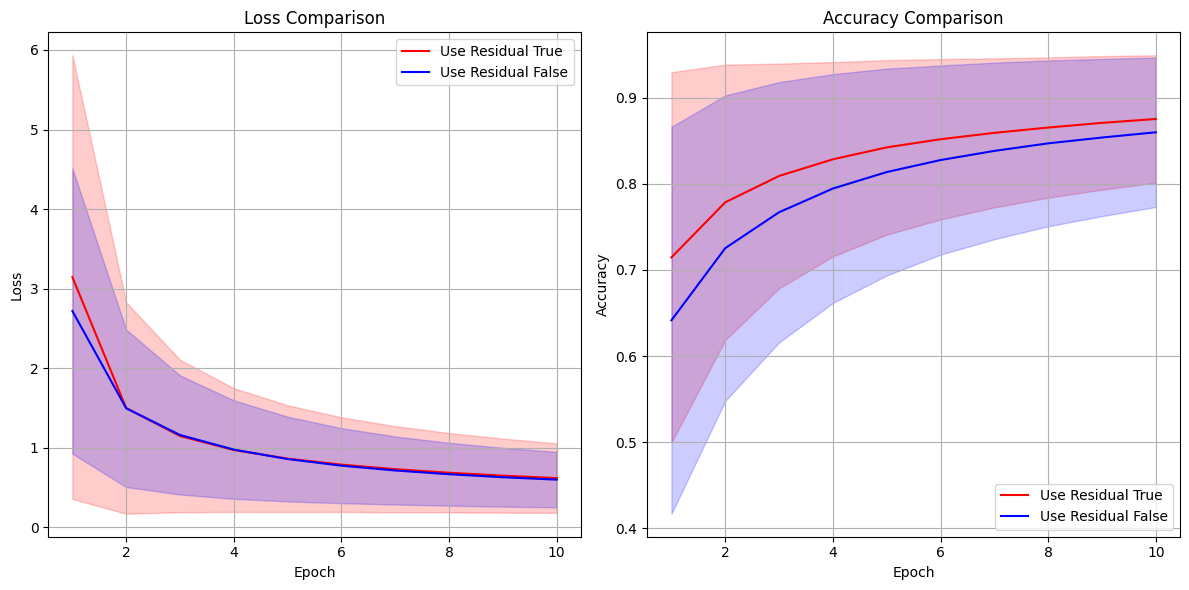

In [80]:
filters1 = {"use_residual": True}
filters2 = {"use_residual": False}
compare_setting_combinations(results, [filters1, filters2], ["Use Residual True", "Use Residual False"])

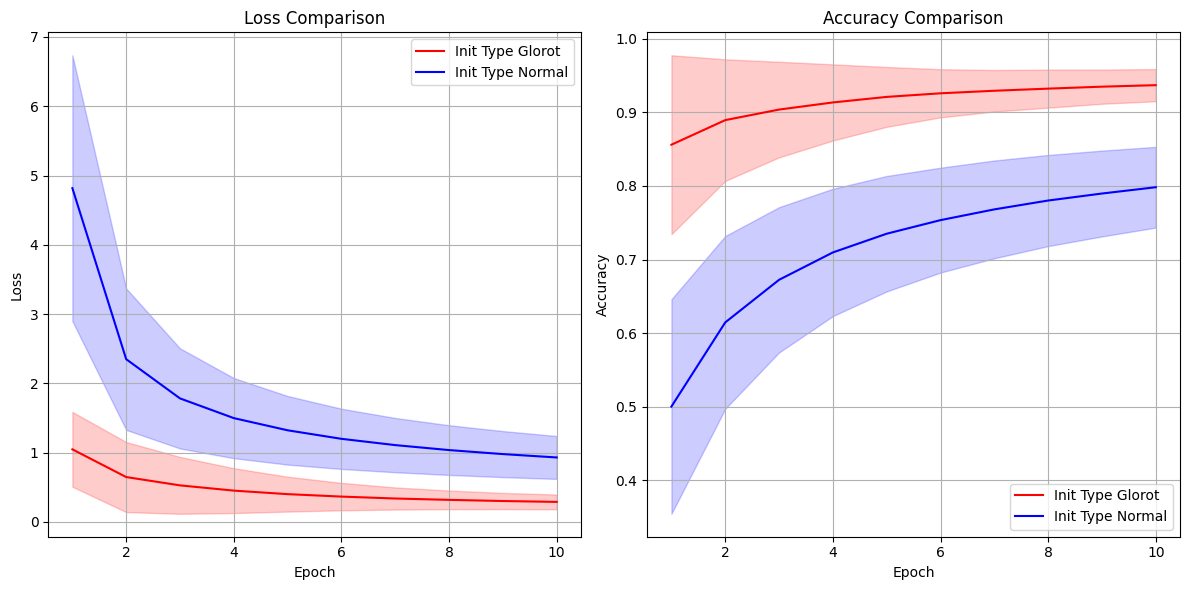

In [81]:
filters1 = {"init_type": "glorot"}
filters2 = {"init_type": "normal"}
compare_setting_combinations(results, [filters1, filters2], ["Init Type Glorot", "Init Type Normal"])

In [116]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load experiment results
with open('experiment_results.json', 'r') as file:
    results = json.load(file)

# Convert JSON data into a DataFrame for analysis
data = pd.json_normalize(results)

# Data Cleaning (Convert necessary columns to numeric for analysis)
data['overall_accuracy'] = pd.to_numeric(data['overall_accuracy'], errors='coerce')
data['train_loss'] = pd.to_numeric(data['train_loss'], errors='coerce')
data['batch_size'] = pd.to_numeric(data['batch_size'], errors='coerce')
data['learning_rate'] = pd.to_numeric(data['learning_rate'], errors='coerce')
data['epochs'] = pd.to_numeric(data['epochs'], errors='coerce')

# Function to categorize learning rates
def categorize_learning_rate(lr):
    # Round to nearest order of magnitude (e.g., 0.01, 0.001, etc.)
    return "{:.5f}".format(10 ** round(np.log10(lr)))

# Apply categorization to the learning rate column
data['learning_rate_group'] = data['learning_rate'].apply(categorize_learning_rate)

# Helper function to group by a single parameter and analyze its effect
def analyze_single_parameter(df, parameter, metric='overall_accuracy'):
    grouped = df.groupby(parameter)[metric].mean().reset_index()
    grouped = grouped.sort_values(by=metric, ascending=False)
    return grouped

# 1. Analyze Effect of Optimizer
optimizer_analysis = analyze_single_parameter(data, 'optimizer', 'overall_accuracy')
print("\nEffect of Optimizer on Overall Accuracy:")
print(optimizer_analysis)


# 2. Analyze Effect of Batch Size
batch_size_analysis = analyze_single_parameter(data, 'batch_size', 'overall_accuracy')
print("\nEffect of Batch Size on Overall Accuracy:")
print(batch_size_analysis)


# 3. Analyze Effect of Categorized Learning Rate
learning_rate_grouped = analyze_single_parameter(data, 'learning_rate_group', 'overall_accuracy')
print("\nEffect of Grouped Learning Rate on Overall Accuracy:")
print(learning_rate_grouped)


# 4. Analyze Effect of Architecture
architecture_analysis = analyze_single_parameter(data, 'architecture', 'overall_accuracy')
print("\nEffect of Architecture on Overall Accuracy:")
print(architecture_analysis)


# 5. Analyze Effect of Epochs
epochs_analysis = analyze_single_parameter(data, 'epochs', 'overall_accuracy')
print("\nEffect of Epochs on Overall Accuracy:")
print(epochs_analysis)




Effect of Optimizer on Overall Accuracy:
  optimizer  overall_accuracy
0      Adam         53.245185
1       SGD         49.320354

Effect of Batch Size on Overall Accuracy:
   batch_size  overall_accuracy
2         256         53.789000
1         128         51.453208
0          64         50.877619
3         512         49.139839

Effect of Grouped Learning Rate on Overall Accuracy:
  learning_rate_group  overall_accuracy
3             0.01000         52.072609
2             0.00100         50.340814
1             0.00010         47.273333
4             0.10000         44.065714
0             0.00001         37.920000

Effect of Architecture on Overall Accuracy:
  architecture  overall_accuracy
1  ModifiedNet         55.565763
0      BaseNet         47.870926

Effect of Epochs on Overall Accuracy:
   epochs  overall_accuracy
3      40         61.793333
2      30         54.432727
1      20         49.916538
0      10         43.940930


In [117]:

# Convert necessary columns to numeric
data['overall_accuracy'] = pd.to_numeric(data['overall_accuracy'], errors='coerce')

# Find the row with the maximum accuracy
max_accuracy_row = data.loc[data['overall_accuracy'].idxmax()]

# Print the maximum accuracy and corresponding configuration
print("\nMaximum Overall Accuracy:")
print(f"Accuracy: {max_accuracy_row['overall_accuracy']:.2f}%")
print("\nConfiguration:")
print(max_accuracy_row.to_string())


Maximum Overall Accuracy:
Accuracy: 66.59%

Configuration:
learning_rate                   0.018874
batch_size                           512
optimizer                            SGD
loss_function               CrossEntropy
architecture                 ModifiedNet
epochs                                30
train_loss                           NaN
overall_accuracy                   66.59
time_taken                     -1.692218
per_class_accuracy.plane            73.7
per_class_accuracy.car              82.8
per_class_accuracy.bird             43.8
per_class_accuracy.cat              37.2
per_class_accuracy.deer             69.5
per_class_accuracy.dog              60.6
per_class_accuracy.frog             77.1
per_class_accuracy.horse            76.0
per_class_accuracy.ship             75.8
per_class_accuracy.truck            69.4
learning_rate_group              0.01000


In [92]:
results_q11 = json.load(open("experiment_results.json"))

In [110]:
# filters1 = {"learning_rate": 0.0001, "epochs": 10}
filters2 = {"learning_rate": 0.001, "epochs": 10}
filters3 = {"learning_rate": 0.01, "epochs": 10}
compare_setting_combinations_2(results_q11, [filters2, filters3], ["Learning Rate 0.001", "Learning Rate 0.01"])

TypeError: string indices must be integers, not 'str'